## Sentiment Analysis

## I. Introduction

The purpose of this notebook is to analyse the sentiment of the podcast transcript and analyze if any trends can be highlighted

## II. Sentiment Analysis with TextBlob
Let's analyse first with the superguest

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('dfguestdataeda.csv')

In [7]:
df.drop(['text stemmed', 'stemmed text','text_stemmed'], axis=1)

,Unnamed: 0,date,guest,duration,text
0,13,2020-05-13,Tom Papa,3:14:57,"""hello. friends, welcome to the show this up, ..."
1,16,2020-05-07,Tony Hinchcliffe,3:07:32,"hello, friends. welcome to the show this episo..."
2,23,2020-04-25,Duncan Trussell,3:17:17,"oh hello, friends, welcome to the show this ep..."
3,36,2020-04-02,Greg Fitzsimmons,3:21:42,hey friends. welcome to the show this episode ...
4,38,2020-03-31,Brian Redban,3:31:47,"hello, friends, and welcome to the show this e..."
...,...,...,...,...,...
109,1006,2014-12-23,Bert Kreischer,3:05:55,"""if you hear those clicks, thats me typing, la..."
110,1022,2014-11-18,Duncan Trussell,2:50:36,"to wine, her for , websites. you look really g..."
111,1043,2014-10-07,Bryan Callen,3:08:44,hello freak pitches back. this episode of the ...
112,1044,2014-09-30,Bryan Callen,3:05:55,we have so much to talk about today. i could b...


In [9]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['text'].apply(pol)
df['subjectivity'] = df['text'].apply(sub)
df

,Unnamed: 0,date,guest,duration,text,stemmed text,text stemmed,text_stemmed,polarity,subjectivity
0,13,2020-05-13,Tom Papa,3:14:57,"""hello. friends, welcome to the show this up, ...","""hello. friends, welcome to the show this up, ...","""hello. friends, welcom to the show thi up, so...","""hello. friends, welcom to the show thi up, so...",0.053571,0.538498
1,16,2020-05-07,Tony Hinchcliffe,3:07:32,"hello, friends. welcome to the show this episo...","hello, friends. welcome to the show this episo...","hello, friends. welcom to the show thi episode...","hello, friends. welcom to the show thi episode...",0.117090,0.502945
2,23,2020-04-25,Duncan Trussell,3:17:17,"oh hello, friends, welcome to the show this ep...","oh hello, friends, welcome to the show this ep...","oh hello, friends, welcom to the show thi epis...","oh hello, friends, welcom to the show thi epis...",0.112542,0.510323
3,36,2020-04-02,Greg Fitzsimmons,3:21:42,hey friends. welcome to the show this episode ...,hey friends. welcome to the show this episode ...,hey friends. welcom to the show thi episod is ...,hey friends. welcom to the show thi episod is ...,0.051359,0.507296
4,38,2020-03-31,Brian Redban,3:31:47,"hello, friends, and welcome to the show this e...","hello, friends, and welcome to the show this e...","hello, friends, and welcom to the show thi epi...","hello, friends, and welcom to the show thi epi...",0.110132,0.510754
...,...,...,...,...,...,...,...,...,...,...
109,1006,2014-12-23,Bert Kreischer,3:05:55,"""if you hear those clicks, thats me typing, la...","""if you hear those clicks, thats me typing, la...","""if you hear those clicks, that me typing, lad...","""if you hear those clicks, that me typing, lad...",0.107425,0.458497
110,1022,2014-11-18,Duncan Trussell,2:50:36,"to wine, her for , websites. you look really g...","to wine, her for , websites. you look really g...","to wine, her for , websites. you look realli g...","to wine, her for , websites. you look realli g...",0.072990,0.515254
111,1043,2014-10-07,Bryan Callen,3:08:44,hello freak pitches back. this episode of the ...,hello freak pitches back. this episode of the ...,hello freak pitch back. thi episod of the germ...,hello freak pitch back. thi episod of the germ...,0.075455,0.512404
112,1044,2014-09-30,Bryan Callen,3:05:55,we have so much to talk about today. i could b...,we have so much to talk about today. i could b...,we have so much to talk about today. i could b...,we have so much to talk about today. i could b...,0.078490,0.532345


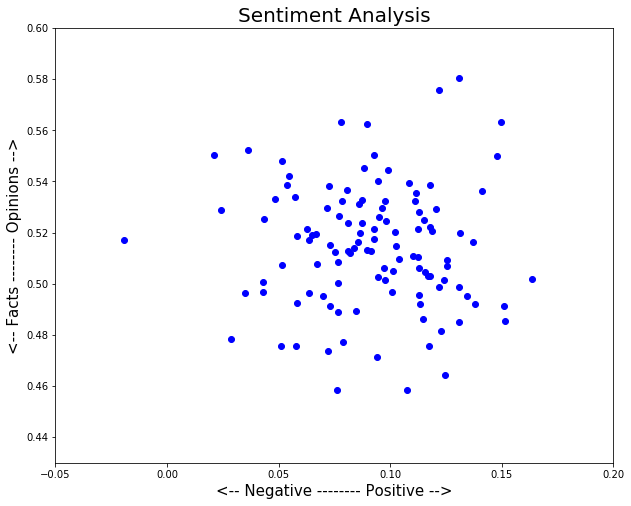

In [21]:
plt.rcParams['figure.figsize'] = [10, 8]

for index, guest in enumerate(df.index):
    x = df.polarity.loc[guest]
    y = df.subjectivity.loc[guest]
    plt.scatter(x, y, color='blue')
    plt.xlim(-0.05, 0.2) 
    plt.ylim(0.43, 0.6) 

    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

Let's see f the trend still holds true witht the full scope of transcript

In [37]:
dfall=pd.read_csv('jrecontentclean.csv')
dfall

,Unnamed: 0,Unnamed: 0.1,date,guest,duration,text
0,0,0,2020-06-03,Krystal & Saagar,NaN,"hey friends, how you doing this episode, the p..."
1,1,1,2020-06-02,Reggie Watts,2:46:32,"hello, friends, welcome to the show this episo..."
2,2,2,2020-05-29,Jesus Trejo,2:52:47,"pillow friends, welcome to the show this episo..."
3,3,3,2020-05-28,Jordan Jonas,2:22:39,"hello, friends, welcome to the show this episo..."
4,4,4,2020-05-27,wittman/JRE MMA Show with Justin Gaethje &amp...,2:58:39,"oh hi, friends welcome to the show this absurd..."
...,...,...,...,...,...,...
1051,1092,1092,2014-09-15,Big Jay Oakerson,2:55:24,"""he keeps getting. burma is hit this. why? i t..."
1052,1093,1093,2014-09-11,Tim Burnett,2:58:43,"baby jesus pogo stick , easy fashion square, ,..."
1053,1094,1094,2014-09-10,Joe DeRosa,2:50:28,"boom, and here we are, ladies and gentlemen, h..."
1054,1095,1095,2014-09-09,Mike Dolce,NaN,"hey everybody here, this , thing is a no bulls..."


In [39]:
df=df.drop(['Unnamed: 0'], axis=1)
df=df.drop(['Unnamed: 0.1'], axis=1)
df.dropna(subset=['duration'], inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [42]:
dfall['polarity'] = dfall['text'].apply(pol)
dfall['subjectivity'] = dfall['text'].apply(sub)
dfall

,Unnamed: 0,Unnamed: 0.1,date,guest,duration,text,polarity,subjectivity
0,0,0,2020-06-03,Krystal & Saagar,NaN,"hey friends, how you doing this episode, the p...",0.096403,0.514565
1,1,1,2020-06-02,Reggie Watts,2:46:32,"hello, friends, welcome to the show this episo...",0.090479,0.512406
2,2,2,2020-05-29,Jesus Trejo,2:52:47,"pillow friends, welcome to the show this episo...",0.122226,0.494044
3,3,3,2020-05-28,Jordan Jonas,2:22:39,"hello, friends, welcome to the show this episo...",0.115488,0.508150
4,4,4,2020-05-27,wittman/JRE MMA Show with Justin Gaethje &amp...,2:58:39,"oh hi, friends welcome to the show this absurd...",0.057919,0.515980
...,...,...,...,...,...,...,...,...
1051,1092,1092,2014-09-15,Big Jay Oakerson,2:55:24,"""he keeps getting. burma is hit this. why? i t...",0.048710,0.507131
1052,1093,1093,2014-09-11,Tim Burnett,2:58:43,"baby jesus pogo stick , easy fashion square, ,...",0.054573,0.522055
1053,1094,1094,2014-09-10,Joe DeRosa,2:50:28,"boom, and here we are, ladies and gentlemen, h...",0.152314,0.513608
1054,1095,1095,2014-09-09,Mike Dolce,NaN,"hey everybody here, this , thing is a no bulls...",0.071094,0.487920


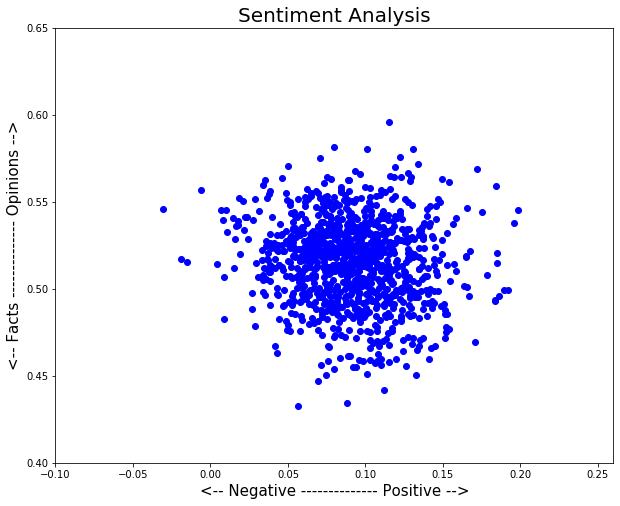

In [47]:
plt.rcParams['figure.figsize'] = [10, 8]

for index, guest in enumerate(dfall.index):
    x = dfall.polarity.loc[guest]
    y = dfall.subjectivity.loc[guest]
    plt.scatter(x, y, color='blue')
    plt.xlim(-0.1, 0.26) 
    plt.ylim(0.4, 0.65) 

    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------------- Opinions -->', fontsize=15)

plt.show()

The sentiment is a bit positive, opinion led at some extent, but there is no real breakthrough with this analysis